In [28]:
# Taken from https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/
# and https://www.statology.org/scree-plot-python/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
df = pd.read_csv('C:\\Users\\bkb3\\Accident_Data_Preprocessing\\Data_Cleaned\\fenrir_feat_eng.csv')
df.head()

,Severity,Distance(mi),County,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,...,Sunrise_Sunset,Year,Month,Day,Season,Snow_Ice,Low_Vis_Weather,Rainy,Qty_Slowing_Elements,Freezing
0,2,0.01,Anne Arundel,0,0,0,0,0,0,0,...,1,2016,11,30,Fall,0,0,0,0,0
1,3,0.01,Anne Arundel,0,0,0,0,0,0,0,...,1,2016,11,30,Fall,0,0,0,0,0
2,2,0.01,Harford,0,0,0,0,0,0,0,...,0,2016,11,30,Fall,0,0,1,1,0
3,2,0.01,Anne Arundel,0,0,0,0,1,0,0,...,0,2016,11,30,Fall,0,0,0,1,0
4,2,0.01,Washington,1,0,0,0,0,0,0,...,0,2016,11,30,Fall,0,0,1,1,0


In [30]:
# X is all columns except class, y is class column
X = df.drop(['Severity','County','Season'], axis=1)
y = df['Severity']

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:2])

[[-0.51132515 -0.08536689 -0.0168513  -0.26032938 -0.05196039 -0.38000551
  -0.03665799 -0.06690359 -0.00586614 -0.12893958 -0.10501613 -0.05876155
  -0.35286013  0.          0.70847589 -2.17743037  1.15327151  1.65417641
  -0.1389235  -0.49414857 -0.29614839 -0.56530898 -0.39906398]
 [-0.51132515 -0.08536689 -0.0168513  -0.26032938 -0.05196039 -0.38000551
  -0.03665799 -0.06690359 -0.00586614 -0.12893958 -0.10501613 -0.05876155
  -0.35286013  0.          0.70847589 -2.17743037  1.15327151  1.65417641
  -0.1389235  -0.49414857 -0.29614839 -0.56530898 -0.39906398]]


In [32]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X_scaled)
print(X_pca[:16])

[[-3.27681391e-01 -1.15211226e+00  4.43310149e-01 -4.53418206e-01
  -1.82541928e+00 -7.02514419e-01 -2.85748277e-01  1.23141768e+00
  -4.97851897e-01  7.90046085e-01  1.00545399e+00 -3.23805963e-01
  -1.95275405e-01 -9.22391425e-01  7.25807989e-01 -9.54956371e-03]
 [-3.27681391e-01 -1.15211226e+00  4.43310149e-01 -4.53418206e-01
  -1.82541928e+00 -7.02514419e-01 -2.85748277e-01  1.23141768e+00
  -4.97851897e-01  7.90046085e-01  1.00545399e+00 -3.23805963e-01
  -1.95275405e-01 -9.22391425e-01  7.25807989e-01 -9.54956371e-03]
 [ 1.99019129e+00  3.26364054e-01  5.67150846e-01 -9.26576533e-01
  -2.67901261e+00 -7.94282927e-01 -9.68943588e-01  9.13452106e-01
   1.87905562e+00  2.78603202e-01  1.43491988e+00 -1.77643658e+00
  -2.72054691e-01  1.68710949e+00 -3.16806737e-02  1.90387360e-01]
 [ 9.08305840e-01 -3.76999481e-01  2.78602002e+00 -2.01911090e+00
  -6.21608405e-01 -1.43329216e+00  7.19879568e-01  5.78106709e-02
  -5.56784871e-02  8.38514173e-01  1.42925087e+00 -4.69148618e-01
   6.54

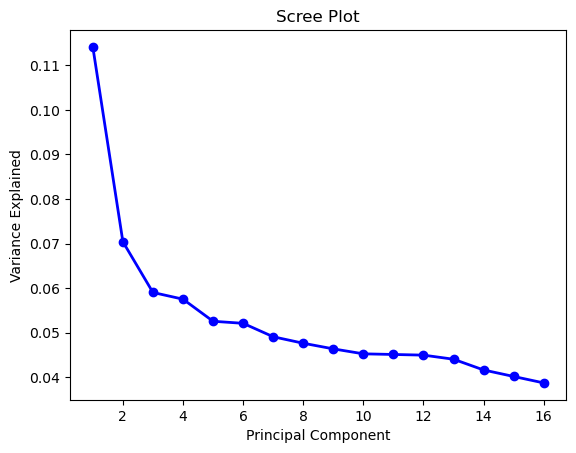

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# bar graph of explained variance of each principle component
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, align='center',
        label='Individual explained variance')

# line graph of cumulative explained variance -- as we add on PCs, how much more variance do we explain?
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Cumulative explained variance')

# make graph pretty
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.tight_layout()
plt.show()


In [34]:
print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

Explained variance: [0.11411197 0.07041532 0.05903575 0.05753336 0.05257933 0.05211802
 0.04910521 0.04765143 0.04638799 0.04527399 0.04513132 0.04498458
 0.04406475 0.04165287 0.04019685 0.03874985]
Cumulative: [0.11411197 0.18452729 0.24356305 0.30109641 0.35367573 0.40579376
 0.45489897 0.5025504  0.5489384  0.59421238 0.6393437  0.68432828
 0.72839303 0.7700459  0.81024275 0.8489926 ]


In [40]:
df_x = pd.DataFrame(X_pca)
df_y = pd.DataFrame(y)
df_x.to_csv("pca_feat_eng_x.csv")
df_y.to_csv("pca_feat_eng_y.csv")